In [1]:
import requests
import bs4 as bs
import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pickle
from google.colab.patches import cv2_imshow
from sklearn.cluster import MiniBatchKMeans
import os
from collections import Counter
from PIL import Image
from time import sleep
%matplotlib inline
from google.colab import drive
from sklearn.metrics import precision_score, accuracy_score,f1_score, fbeta_score
import matplotlib
import matplotlib.pyplot as pp
import pandas as pd 

In [2]:
drive.mount("/content/drive", force_remount=True)
data_path = "/content/drive/Shareddrives/PokémonSerina/Pokemon_resized"

Mounted at /content/drive


In [3]:
dirs = os.listdir(data_path)
pokemon = []
frequenza = []

f = open("/content/drive/Shareddrives/PokémonSerina/NumeroPokèmon.csv","w")
f.write("pokemon" + "\t\t"+ "numero immagini" + "\n")
dirs.sort()
for folder in dirs:
 dirs_2= os.listdir(data_path+'/'+folder)
 count = 0
 for path in dirs_2:
   count = count + 1
 print(folder, count)
 pokemon.append(folder)
 frequenza.append(count)
 f.write(folder + "\t\t"+ str(count) + "\n")
f.close()

print('- Salvataggio Completato -')

1.Bulbasaur 88
10.Caterpie 63
100.Voltorb 65
101.Electrode 63
102.Exeggcute 59
103.Exeggutor 55
104.Cubone 58
105.Marowak 60
106.Hitmonlee 63
107.Hitmonchan 58
108.Likitung 60
109.Koffing 59
11.Metapod 62
110.Weezing 60
111.Rhyhorn 72
112.Rhydon 74
113.Chansey 56
114.Tangela 56
115.Kangaskhan 57
116.Horsea 63
117.Seadra 56
118.Goldeen 72
119.Seaking 73
12.Butterfree 75
120.Staryu 62
121.Starmie 61
122.MrMime 58
123.Scyther 79
124.Jynx 62
125.Electabuzz 60
126.Magmar 60
127.Pinsir 58
128.Tauros 61
129.Magikarp 70
13.Weedle 58
130.Gyarados 75
131.Lapras 67
132.Ditto 57
133.Eevee 58
134.Vaporeon 74
135.Jolteon 66
136.Flareon 63
137.Porygon 56
138.Omanyte 57
139.Omastar 59
14.Kakuna 62
140.Kabuto 63
141.Kabutops 59
142.Aerodactyl 98
143.Snorlax 70
144.Articuno 61
145.Zapdos 60
146.Moltres 69
147.Dratini 70
148.Dragonair 66
149.Dragonite 61
15.Beedrill 62
150.Mewtwo 83
151.Mew 74
16.Pidgey 60
17.Pidgeotto 58
18.Pidgeot 62
19.Rattata 77
2.Ivysaur 67
20.Raticate 73
21.Spearow 82
22.Fearow 69


In [4]:
print(pokemon)
print(frequenza)

['1.Bulbasaur', '10.Caterpie', '100.Voltorb', '101.Electrode', '102.Exeggcute', '103.Exeggutor', '104.Cubone', '105.Marowak', '106.Hitmonlee', '107.Hitmonchan', '108.Likitung', '109.Koffing', '11.Metapod', '110.Weezing', '111.Rhyhorn', '112.Rhydon', '113.Chansey', '114.Tangela', '115.Kangaskhan', '116.Horsea', '117.Seadra', '118.Goldeen', '119.Seaking', '12.Butterfree', '120.Staryu', '121.Starmie', '122.MrMime', '123.Scyther', '124.Jynx', '125.Electabuzz', '126.Magmar', '127.Pinsir', '128.Tauros', '129.Magikarp', '13.Weedle', '130.Gyarados', '131.Lapras', '132.Ditto', '133.Eevee', '134.Vaporeon', '135.Jolteon', '136.Flareon', '137.Porygon', '138.Omanyte', '139.Omastar', '14.Kakuna', '140.Kabuto', '141.Kabutops', '142.Aerodactyl', '143.Snorlax', '144.Articuno', '145.Zapdos', '146.Moltres', '147.Dratini', '148.Dragonair', '149.Dragonite', '15.Beedrill', '150.Mewtwo', '151.Mew', '16.Pidgey', '17.Pidgeotto', '18.Pidgeot', '19.Rattata', '2.Ivysaur', '20.Raticate', '21.Spearow', '22.Fearow',

In [5]:
df = pd.read_csv('/content/drive/Shareddrives/PokémonSerina/NumeroPokèmon.csv')
df.info

<bound method DataFrame.info of     pokemon\t\tnumero immagini
0            1.Bulbasaur\t\t88
1            10.Caterpie\t\t63
2            100.Voltorb\t\t65
3          101.Electrode\t\t63
4          102.Exeggcute\t\t59
..                         ...
146              95.Onix\t\t53
147           96.Drowzee\t\t54
148             97.Hypno\t\t75
149            98.Krabby\t\t62
150           99.Kingler\t\t56

[151 rows x 1 columns]>

           Pokèmon  Numero immagini
0      1.Bulbasaur               88
1      10.Caterpie               63
2      100.Voltorb               65
3    101.Electrode               63
4    102.Exeggcute               59
..             ...              ...
146        95.Onix               53
147     96.Drowzee               54
148       97.Hypno               75
149      98.Krabby               62
150     99.Kingler               56

[151 rows x 2 columns]


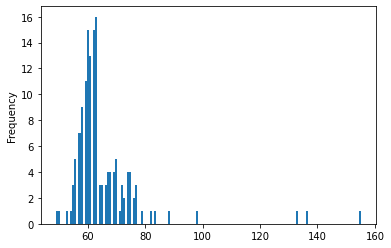

In [6]:
df = pd.DataFrame(list(zip(pokemon,frequenza)), columns = ['Pokèmon','Numero immagini'])
print(df)
df['Numero immagini'].plot(kind='hist', bins=150)


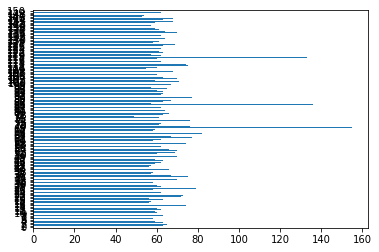

In [7]:
df['Numero immagini'].plot(kind='barh')

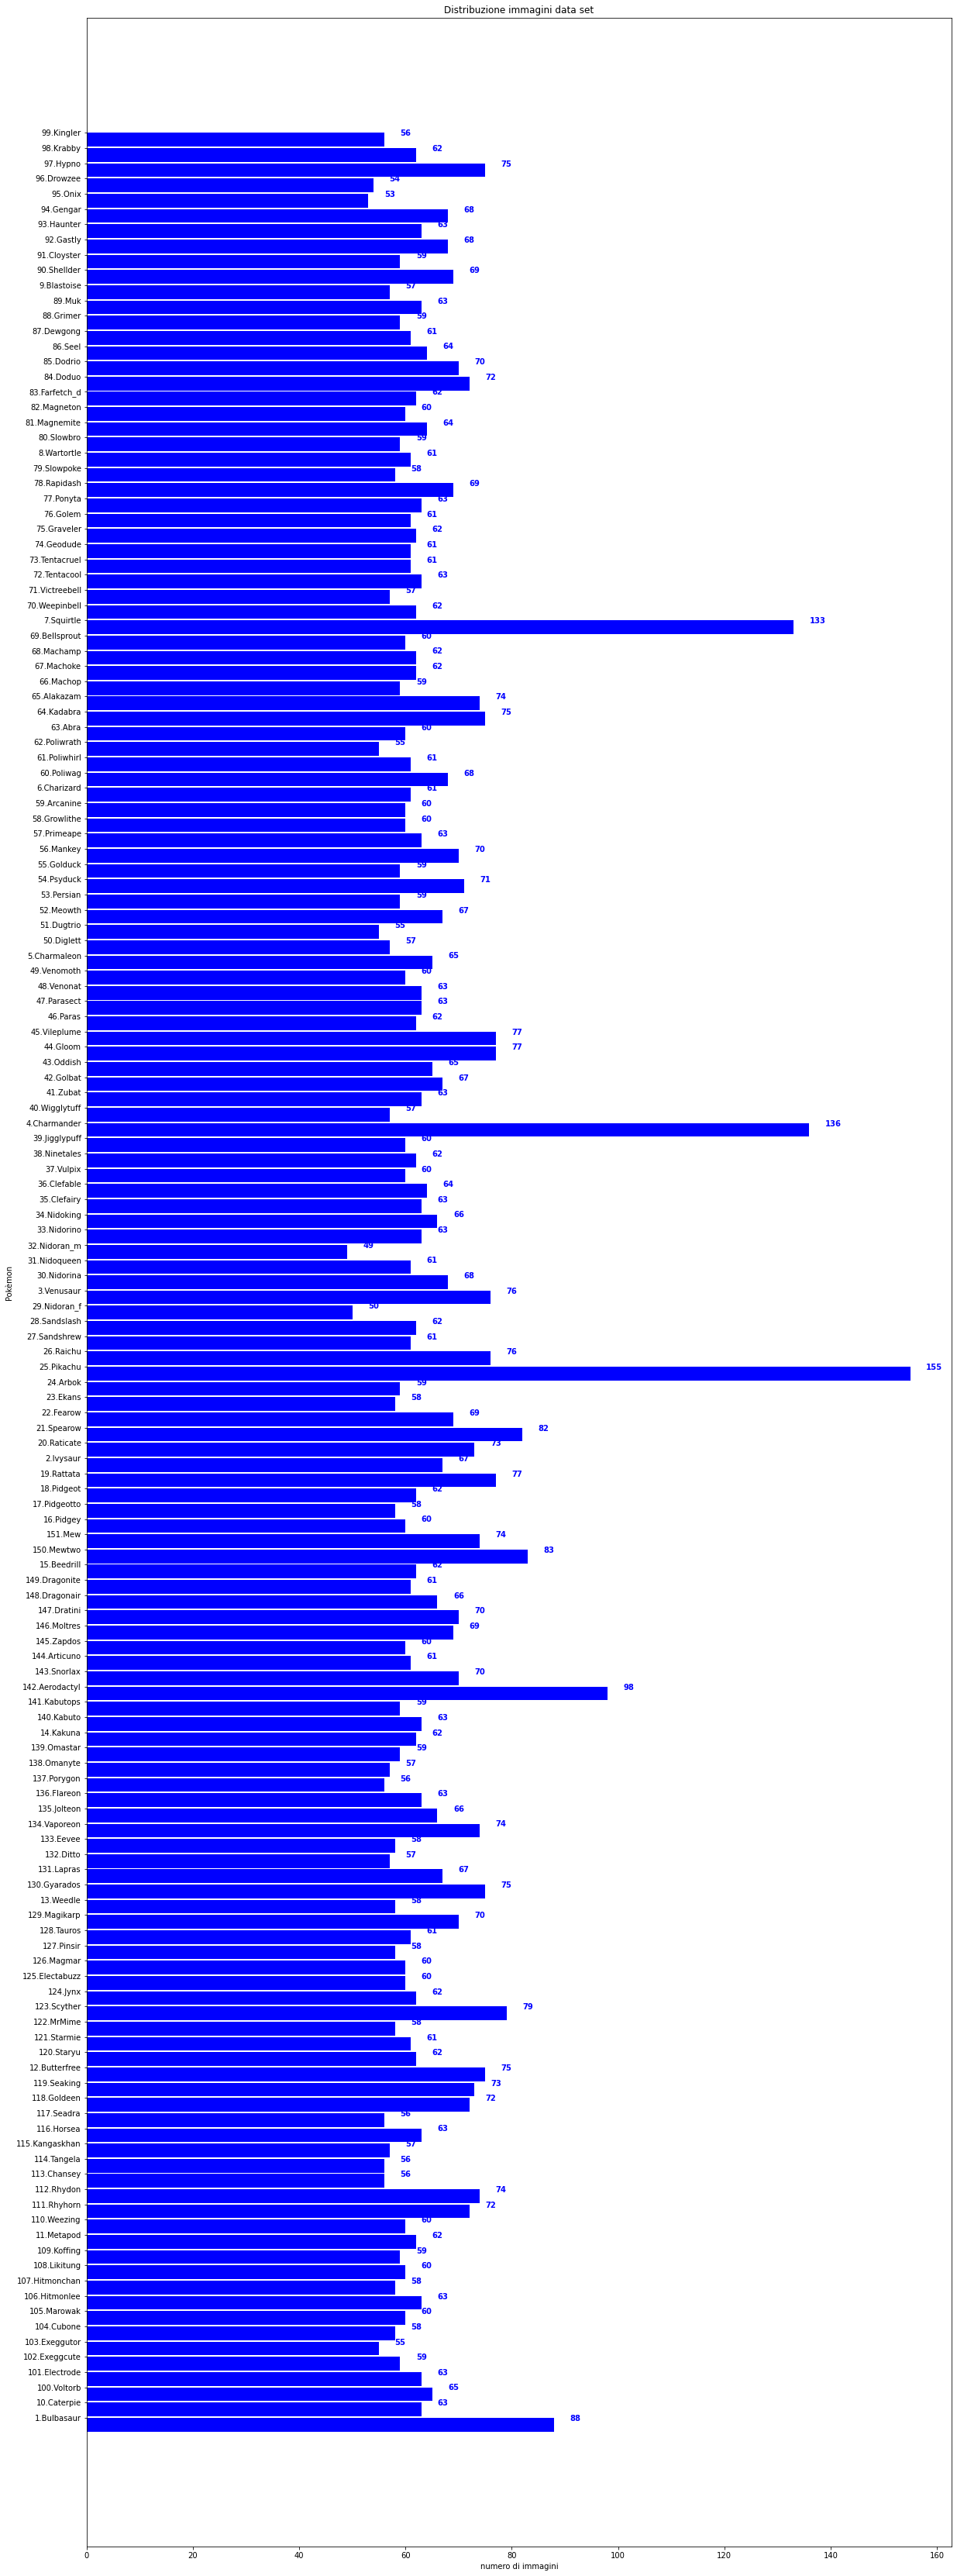

In [8]:
x = pokemon
y = frequenza

fig, ax = plt.subplots(figsize=(20, 60))    
width = 0.9 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.title('Distribuzione immagini data set')
plt.xlabel('numero di immagini')
plt.ylabel('Pokèmon')
plt.savefig(os.path.join('/content/drive/Shareddrives/PokémonSerina/grafico.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
